# Reducción de Dimensionalidad mediante la Extracción de Componentes Principales

---

## 🍇 Conjunto de Datos del Vino

* **Nombre del Conjunto de Datos:** [Wine (Vino)](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/)
* **Contexto:** Este conjunto de datos se utiliza a menudo para ilustrar la **clasificación** y las técnicas de **reducción de dimensionalidad** como PCA.
* **Descripción:** Contiene los resultados de un análisis químico de vinos cultivados en la misma región en Italia pero derivados de **tres** cultivares diferentes.
* **Características (Features):** El conjunto de datos tiene **13 atributos** diferentes (características químicas) utilizados para predecir el cultivar (clase) al que pertenece el vino.

| Atributo (Feature) | Descripción (Ejemplos) |
| :--- | :--- |
| **Alcohol** | Contenido de alcohol. |
| **Malic acid** | Ácido málico. |
| **Ash** | Contenido de ceniza. |
| **Alcalinity of ash** | Alcalinidad de la ceniza. |
| **Magnesium** | Magnesio. |
| **Total phenols** | Fenoles totales. |
| **Flavanoids** | Flavonoides. |
| **Nonflavanoid phenols** | Fenoles no flavonoides. |
| **Proanthocyanins** | Proantocianinas. |
| **Color intensity** | Intensidad del color. |
| **Hue** | Tonalidad. |
| **OD280/OD315 of diluted wines** | Razón entre dos densidades ópticas. |
| **Proline** | Prolina. |

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine

df = pd.read_csv('./data/wine.csv')
df.shape

(178, 14)

In [11]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
X = df.iloc[:, 1:]
y = df['class']

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

pca = PCA(n_components=2)
pca.fit(X_train_sc)
pca.explained_variance_ratio_

array([0.35900066, 0.18691934])

In [13]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187]


In [14]:
pd.DataFrame(np.round(pca.components_, 3), columns=X.columns).T

,0,1
Alcohol,0.128,0.493
Malic acid,-0.256,0.190
Ash,-0.022,0.317
Alcalinity of ash,-0.244,-0.035
Magnesium,0.148,0.262
Total phenols,0.385,0.096
Flavanoids,0.420,0.015
Nonflavanoid phenols,-0.299,0.076
Proanthocyanins,0.308,0.074
Color intensity,-0.119,0.534


# Reducción de Dimensionalidad: Sin Idea Preconcebida del Número de PCA

---

## 🧐 Estrategia para Elegir el Número de Componentes Principales (PCA)

Cuando no se tiene un número fijo en mente para los Componentes Principales (PCAs), se utilizan técnicas de análisis de varianza para tomar una decisión **informada** y **objetiva**. El objetivo es encontrar el número mínimo de componentes que retengan la mayor parte de la información (varianza) de los datos originales.

### 1. Varianza Explicada Acumulada

Se calcula la varianza que explica cada componente y luego se suma progresivamente.

* **Objetivo de Varianza:** Se elige el número mínimo de componentes que, en conjunto, alcanzan un **porcentaje umbral predefinido** de la varianza total de los datos originales.
    * Los umbrales más comunes son el **90%**, **95%** o **99%**.
    * Este método es cuantitativo y directo: si 3 componentes explican el 92% de la varianza, se eligen 3 PCAs.

### 2. Gráfico de Sedimentación (*Scree Plot*)

Es una herramienta visual que grafica la varianza explicada por cada componente individualmente.

* **Regla del Codo (*Elbow Rule*)**: Se busca el punto en el gráfico donde la curva de varianza explicada se **dobla** o "acorva" abruptamente.
* El componente justo **antes** de este "codo" es el último que aporta una cantidad significativa de varianza. Después del codo, la contribución de los nuevos componentes es marginal y se considera principalmente "ruido".

In [15]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)
pca.transform(X_train_sc)
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187 0.116 0.074 0.067 0.049 0.042 0.027 0.023 0.019 0.017 0.013
 0.008]


In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35900066, 0.54592   , 0.66198557, 0.73570273, 0.80224132,
       0.85078714, 0.89273756, 0.91957678, 0.94305138, 0.96194872,
       0.97910815, 0.99173743, 1.        ])

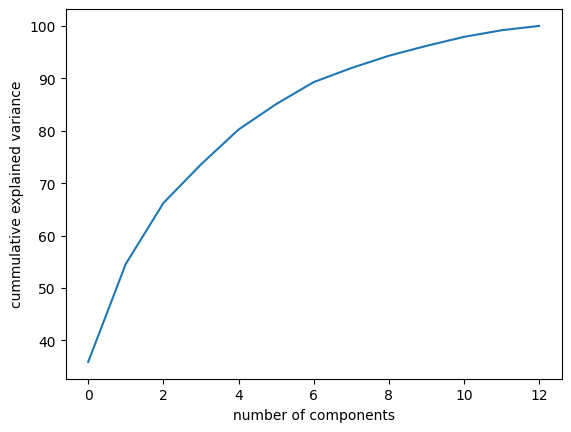

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.)
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance');

---

In [8]:
res = pca.transform(X_train_sc)
index_name = ['PCA_'+str(k) for k in range(0, len(res))]

df1 = pd.DataFrame(res, columns=df.columns[1:],
                   index=index_name)[0:4]
df1.T.sort_values(by='PCA_0')

,PCA_0,PCA_1,PCA_2,PCA_3
flavanoids,-3.260333,1.190068,-1.198740,-2.760429
magnesium,-1.323253,-0.343781,-1.229717,-1.237827
proline,-0.567275,-0.017960,0.307950,-0.636017
class,-0.491375,-0.108618,0.495393,-0.415086
nonflavanoid_phenols,-0.147705,1.110783,-0.929523,-0.394314
proanthocyanins,-0.123363,0.039326,0.782084,-0.008591
hue,0.019865,0.329651,0.184735,-0.336521
color_intensity,0.053117,0.558505,0.801178,0.002558
total_phenols,0.145518,-0.350584,0.157158,-0.383985
od280/od315_of_diluted_wines,0.331976,-0.303789,-0.664060,0.071574
